---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [1]:
bbtheory_chars={} 
Penny=''
Raj=''
Sheldon=''
Leonard=''
Howard=''
Amy=''
Bernadette=''

with open("big_bang_transcripts/season_all/merged1-3.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged4-6.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged7-9.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged10.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
       

bbtheory_chars['Raj']=Raj
bbtheory_chars['Penny']=Penny
bbtheory_chars['Sheldon']=Sheldon
bbtheory_chars['Leonard']=Leonard
bbtheory_chars['Howard']=Howard

In [2]:

import pandas as pd
df1 = pd.DataFrame([x for x in bbtheory_chars['Raj'].split('\n')])

df2 = pd.DataFrame([x for x in bbtheory_chars['Penny'].split('\n')])

df3 = pd.DataFrame([x for x in bbtheory_chars['Sheldon'].split('\n')])
df4 = pd.DataFrame([x for x in bbtheory_chars['Leonard'].split('\n')])

df5 = pd.DataFrame([x for x in bbtheory_chars['Howard'].split('\n')])


In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df1.head()

,0
0,It’s fantastic. Unbelievable.
1,Why?
2,Smooth.
3,Are there any chopsticks?
4,"Also, the pretty girl left."


In [5]:
listOfCharacters1 = [False] *df1.shape[0]
listOfCharacters2 = [False] *df2.shape[0]
listOfCharacters3 = [False] *df3.shape[0]
listOfCharacters4 = [True] *df4.shape[0]
listOfCharacters5 = [False] *df5.shape[0]


In [6]:
df1['Leonard'] = listOfCharacters1
df2['Leonard'] = listOfCharacters2 
df3['Leonard'] = listOfCharacters3
df4['Leonard'] = listOfCharacters4
df5['Leonard'] = listOfCharacters5


In [7]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})


In [8]:
df = pd.concat([df1, df2,df3,df4,df5])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Dialogue,Leonard
0,I haven’t seen him this stuck since he tried to figure out the third Matrix movie.,True
1,"All right, Mother. Um, have a nice flight.",True
2,"Wait a minute. I know this may sound far fetched, but I’m on the market now. You know, if I dat...",False
3,Already taken care of. Observe. This is a live shot of Kripke’s lab via a mini webcam I was abl...,False
4,"No, Changs.",True


In [9]:
df.head(10)

,Dialogue,Leonard
0,I haven’t seen him this stuck since he tried to figure out the third Matrix movie.,True
1,"All right, Mother. Um, have a nice flight.",True
2,"Wait a minute. I know this may sound far fetched, but I’m on the market now. You know, if I dat...",False
3,Already taken care of. Observe. This is a live shot of Kripke’s lab via a mini webcam I was abl...,False
4,"No, Changs.",True
5,"Please, Leonard, not now. Once again, Penny and I have begun our little tango.",False
6,"Mm. Well, I think more about if I’d have any regrets.",True
7,You didn’t tell me for a year?,False
8,Girls.,False
9,"Okay, moving on. Now, who are these guys at Disney World?",False


In [10]:
from io import StringIO
col = [ 'Dialogue','Leonard']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Dialogue', 'Leonard']
category_id_df = df[['Dialogue', 'Leonard']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Leonard', 'Dialogue']].values)
df.head(10)


,Dialogue,Leonard
0,I haven’t seen him this stuck since he tried to figure out the third Matrix movie.,True
1,"All right, Mother. Um, have a nice flight.",True
2,"Wait a minute. I know this may sound far fetched, but I’m on the market now. You know, if I dat...",False
3,Already taken care of. Observe. This is a live shot of Kripke’s lab via a mini webcam I was abl...,False
4,"No, Changs.",True
5,"Please, Leonard, not now. Once again, Penny and I have begun our little tango.",False
6,"Mm. Well, I think more about if I’d have any regrets.",True
7,You didn’t tell me for a year?,False
8,Girls.,False
9,"Okay, moving on. Now, who are these guys at Disney World?",False


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [12]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

,Dialogue,Leonard
0,havent seen stuck since tried figure third matri movie,True
1,right mother um nice flight,True
2,wait minute know may sound far fetched im market know dated mandy would teach leonard amy lesson,False
3,already taken care observe live shot kripkes lab via mini webcam able install thanks dollar bill...,False
4,changs,True


In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [14]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 5937 unique tokens.


{'you': 1,
 'i': 2,
 'a': 3,
 'the': 4,
 'to': 5,
 'and': 6,
 'it': 7,
 'of': 8,
 'that': 9,
 'in': 10,
 'my': 11,
 'me': 12,
 'is': 13,
 'i’m': 14,
 'on': 15,
 'what': 16,
 'with': 17,
 'this': 18,
 'for': 19,
 'we': 20,
 'have': 21,
 'oh': 22,
 'like': 23,
 'it’s': 24,
 'so': 25,
 'be': 26,
 'was': 27,
 'do': 28,
 'but': 29,
 'know': 30,
 'your': 31,
 'don’t': 32,
 'no': 33,
 'just': 34,
 'not': 35,
 'are': 36,
 'okay': 37,
 'if': 38,
 'about': 39,
 'well': 40,
 'you’re': 41,
 'can': 42,
 'all': 43,
 'her': 44,
 'uh': 45,
 'yeah': 46,
 'up': 47,
 'how': 48,
 'out': 49,
 'at': 50,
 'that’s': 51,
 'she': 52,
 'get': 53,
 'hey': 54,
 'one': 55,
 'he': 56,
 'right': 57,
 'go': 58,
 'think': 59,
 'want': 60,
 'got': 61,
 'here': 62,
 'did': 63,
 'why': 64,
 'when': 65,
 'good': 66,
 'going': 67,
 'him': 68,
 'come': 69,
 'sheldon': 70,
 'they': 71,
 'from': 72,
 'say': 73,
 'could': 74,
 'an': 75,
 'as': 76,
 'now': 77,
 'can’t': 78,
 'look': 79,
 'guys': 80,
 'see': 81,
 'there': 82,
 'r

In [18]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (38873, 120)


array([[   0,    0,    0, ...,  569, 1011,  325],
       [   0,    0,    0, ...,  256,  184, 2489],
       [   0,    0,    0, ..., 2596,  119,  286],
       ...,
       [   0,    0,    0, ...,    0,    0,   54],
       [   0,    0,    0, ...,    0,    0,  117],
       [   0,    0,    0, ...,   88,   81,  725]], dtype=int32)

In [20]:
Y = pd.get_dummies(df['Leonard']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(26044, 120) (26044, 2)
(12829, 120) (12829, 2)


In [22]:
X_test


array([[   0,    0,    0, ...,   60,  175, 2142],
       [   0,    0,    0, ...,  827,  593,  411],
       [   0,    0,    0, ...,   70,   70,   37],
       ...,
       [   0,    0,    0, ...,   30,  491,  119],
       [   0,    0,    0, ...,  619,  292, 1993],
       [   0,    0,    0, ...,    0,  133,  249]], dtype=int32)

In [23]:
Y_test


array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [24]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [25]:
X.shape[1]

120

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1017 13:57:40.452064 140735737635712 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 23439 samples, validate on 2605 samples
Epoch 1/10
23439/23439 [==============================] - 28s 1ms/sample - loss: 0.5601 - accuracy: 0.7507 - val_loss: 0.5334 - val_accuracy: 0.7593
Epoch 2/10
23439/23439 [==============================] - 27s 1ms/sample - loss: 0.5218 - accuracy: 0.7523 - val_loss: 0.5332 - val_accuracy: 0.7601
Epoch 3/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 0.4988 - accuracy: 0.7575 - val_loss: 0.5367 - val_accuracy: 0.7570
Epoch 4/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 0.4802 - accuracy: 0.7629 - val_loss: 0.5447 - val_accuracy: 0.7501
Epoch 5/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 0.4612 - accuracy: 0.7721 - val_loss: 0.5670 - val_accuracy: 0.7382


In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 23439 samples, validate on 2605 samples
Epoch 1/10
14592/23439 [=================>............] - ETA: 23s - loss: 0.3746 - accuracy: 0.8774

In [27]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12829/12829 [==============================] - 11s 890us/sample - loss: 0.5961 - accuracy: 0.7320
Test set
  Loss: 0.596
  Accuracy: 0.732


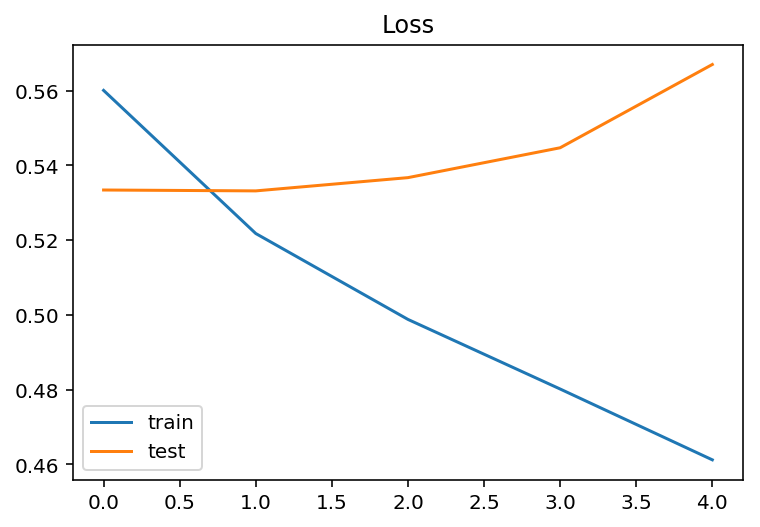

In [28]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [29]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[0.99756455, 0.00243547],
       [0.26872736, 0.7312727 ],
       [0.44202107, 0.5579789 ],
       ...,
       [0.9962931 , 0.00370682],
       [0.88737875, 0.11262126],
       [0.46401873, 0.53598124]], dtype=float32)

In [30]:
Y_test


array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [31]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[0 1 1 ... 0 0 1]


In [32]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 1 1 ... 0 0 0]


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)



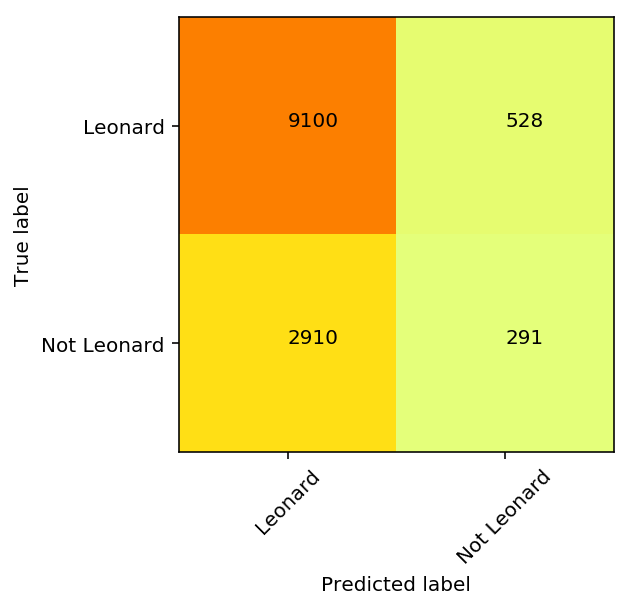

In [34]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Leonard','Not Leonard']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(conf_mat[i][j]))
plt.show()

In [36]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Leonard', 'Not Leonard']
print(classification_report(y_true, y_pred, target_names=target_names))
     ####----end here---##

              precision    recall  f1-score   support

     Leonard       0.76      0.95      0.84      9628
 Not Leonard       0.36      0.09      0.14      3201

    accuracy                           0.73     12829
   macro avg       0.56      0.52      0.49     12829
weighted avg       0.66      0.73      0.67     12829



In [190]:
Y_train = np.array(Y_train)
Y_train = np.argmax(Y_train, axis=-1)    
print(Y_train)

[0 0 0 ... 0 0 0]


In [191]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
#print(clf.predict(X[2:3]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [192]:
y_pred1=clf.predict(X_test)

In [194]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 1 0 ... 0 0 0]


In [195]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Chandler', 'Not Chandler']
print(classification_report(y_true, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

    Chandler       0.84      1.00      0.91     27460
Not Chandler       0.25      0.00      0.00      5287

    accuracy                           0.84     32747
   macro avg       0.54      0.50      0.46     32747
weighted avg       0.74      0.84      0.77     32747

